In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from PIL import Image
import warnings

warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11

print("Libraries imported successfully")


Libraries imported successfully


In [2]:
RESULTS_DIR = Path('../runs/detect/pcb_defect_yolov8n6')
RESULTS_CSV = RESULTS_DIR / 'results.csv'

if RESULTS_CSV.exists():
    results_df = pd.read_csv(RESULTS_CSV)
    results_df.columns = results_df.columns.str.strip()
    print(f"Training results loaded: {len(results_df)} epochs")
    print(f"\nDataset split used:")
    print(f"  Training: 522 images")
    print(f"  Validation: 48 images")
    print(f"  Test: 38 images")
else:
    print(f"ERROR: Results not found at {RESULTS_CSV}")


Training results loaded: 50 epochs

Dataset split used:
  Training: 522 images
  Validation: 48 images
  Test: 38 images


In [3]:
print("\n" + "="*70)
print("TRAINING SUMMARY")
print("="*70)

final_epoch = results_df.iloc[-1]

print(f"\nTraining Configuration:")
print(f"  Model: YOLOv8n (nano)")
print(f"  Epochs: {len(results_df)}")
print(f"  Batch Size: 4")
print(f"  Image Size: 640x640")
print(f"  Optimizer: AdamW")

print(f"\nLoss Progression:")
print(f"  Initial Box Loss: {results_df.iloc[0]['train/box_loss']:.4f}")
print(f"  Final Box Loss: {final_epoch['train/box_loss']:.4f}")
print(f"  Reduction: {((results_df.iloc[0]['train/box_loss'] - final_epoch['train/box_loss']) / results_df.iloc[0]['train/box_loss'] * 100):.1f}%")

print(f"\nFinal Validation Metrics (Epoch {len(results_df)}):")
print(f"  mAP@50: {final_epoch['metrics/mAP50(B)']:.4f}")
print(f"  mAP@50-95: {final_epoch['metrics/mAP50-95(B)']:.4f}")
print(f"  Precision: {final_epoch['metrics/precision(B)']:.4f}")
print(f"  Recall: {final_epoch['metrics/recall(B)']:.4f}")

print("\n" + "="*70)



TRAINING SUMMARY

Training Configuration:
  Model: YOLOv8n (nano)
  Epochs: 50
  Batch Size: 4
  Image Size: 640x640
  Optimizer: AdamW

Loss Progression:
  Initial Box Loss: 1.7477
  Final Box Loss: 0.5606
  Reduction: 67.9%

Final Validation Metrics (Epoch 50):
  mAP@50: 0.9949
  mAP@50-95: 0.8308
  Precision: 0.9933
  Recall: 0.9999



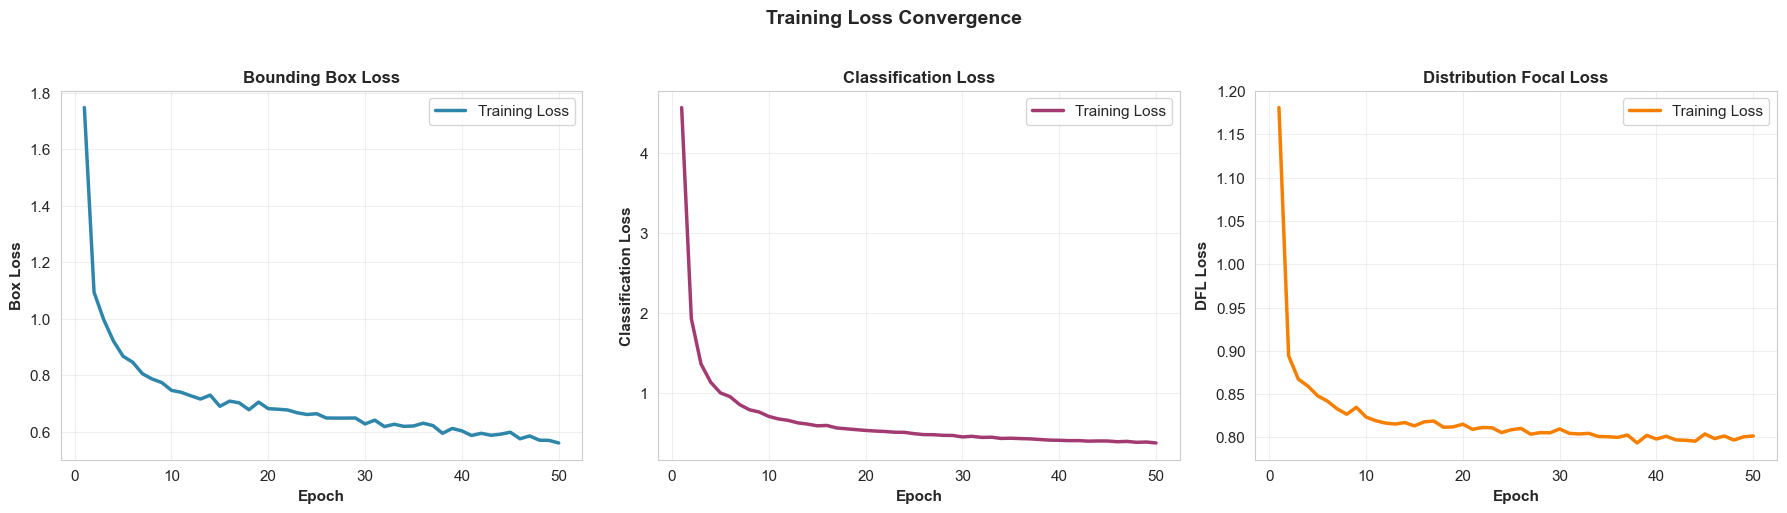

Loss decreased consistently - model learned effectively


In [4]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].plot(results_df['epoch'], results_df['train/box_loss'], 
             linewidth=2.5, color='#2E86AB', label='Training Loss')
axes[0].set_xlabel('Epoch', fontweight='bold')
axes[0].set_ylabel('Box Loss', fontweight='bold')
axes[0].set_title('Bounding Box Loss', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].legend()

axes[1].plot(results_df['epoch'], results_df['train/cls_loss'], 
             linewidth=2.5, color='#A23B72', label='Training Loss')
axes[1].set_xlabel('Epoch', fontweight='bold')
axes[1].set_ylabel('Classification Loss', fontweight='bold')
axes[1].set_title('Classification Loss', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

axes[2].plot(results_df['epoch'], results_df['train/dfl_loss'], 
             linewidth=2.5, color='#F77F00', label='Training Loss')
axes[2].set_xlabel('Epoch', fontweight='bold')
axes[2].set_ylabel('DFL Loss', fontweight='bold')
axes[2].set_title('Distribution Focal Loss', fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3)
axes[2].legend()

plt.suptitle('Training Loss Convergence', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("Loss decreased consistently - model learned effectively")


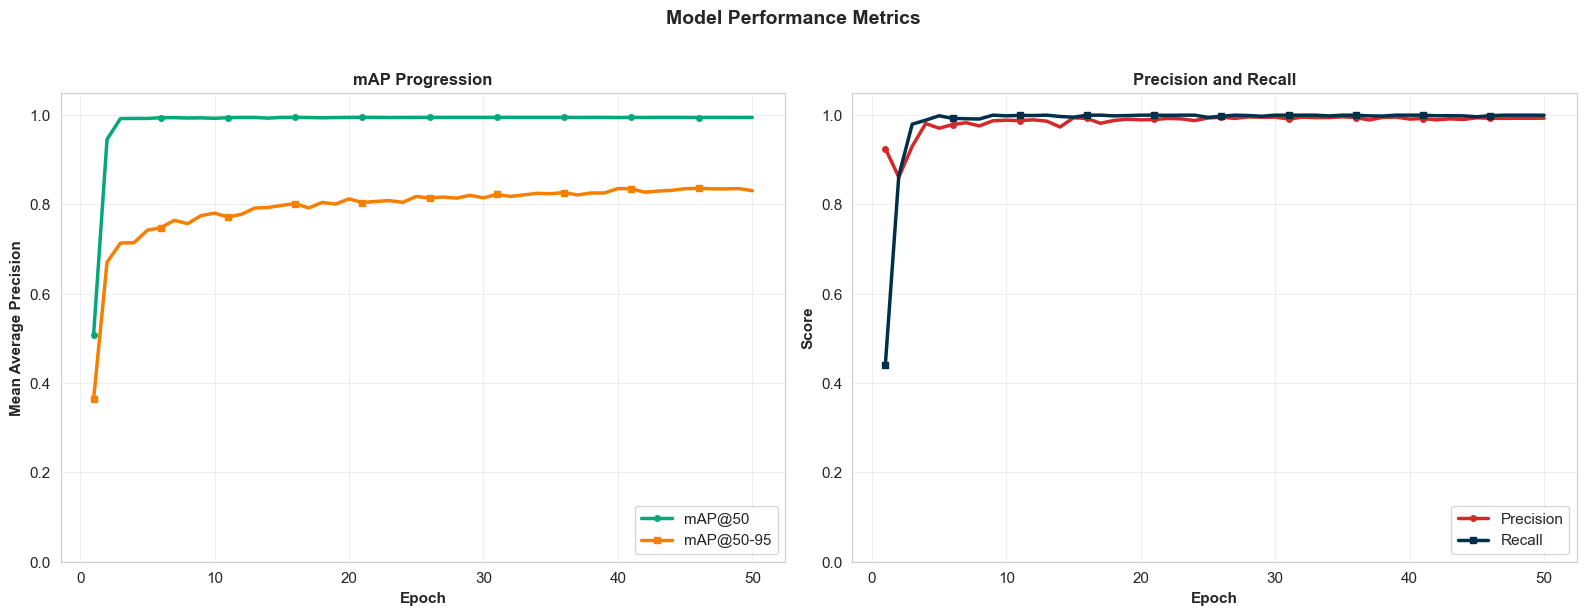

Peak mAP@50: 0.9950
Peak Precision: 0.9962
Peak Recall: 1.0000


In [5]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].plot(results_df['epoch'], results_df['metrics/mAP50(B)'], 
             linewidth=2.5, color='#06A77D', label='mAP@50', marker='o', 
             markersize=4, markevery=5)
axes[0].plot(results_df['epoch'], results_df['metrics/mAP50-95(B)'], 
             linewidth=2.5, color='#F77F00', label='mAP@50-95', marker='s', 
             markersize=4, markevery=5)
axes[0].set_xlabel('Epoch', fontweight='bold')
axes[0].set_ylabel('Mean Average Precision', fontweight='bold')
axes[0].set_title('mAP Progression', fontsize=12, fontweight='bold')
axes[0].set_ylim(0, 1.05)
axes[0].grid(True, alpha=0.3)
axes[0].legend(loc='lower right')

axes[1].plot(results_df['epoch'], results_df['metrics/precision(B)'], 
             linewidth=2.5, color='#D62828', label='Precision', marker='o', 
             markersize=4, markevery=5)
axes[1].plot(results_df['epoch'], results_df['metrics/recall(B)'], 
             linewidth=2.5, color='#003049', label='Recall', marker='s', 
             markersize=4, markevery=5)
axes[1].set_xlabel('Epoch', fontweight='bold')
axes[1].set_ylabel('Score', fontweight='bold')
axes[1].set_title('Precision and Recall', fontsize=12, fontweight='bold')
axes[1].set_ylim(0, 1.05)
axes[1].grid(True, alpha=0.3)
axes[1].legend(loc='lower right')

plt.suptitle('Model Performance Metrics', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print(f"Peak mAP@50: {results_df['metrics/mAP50(B)'].max():.4f}")
print(f"Peak Precision: {results_df['metrics/precision(B)'].max():.4f}")
print(f"Peak Recall: {results_df['metrics/recall(B)'].max():.4f}")


Training Visualizations Generated by YOLOv8:


Results and Training Curves:


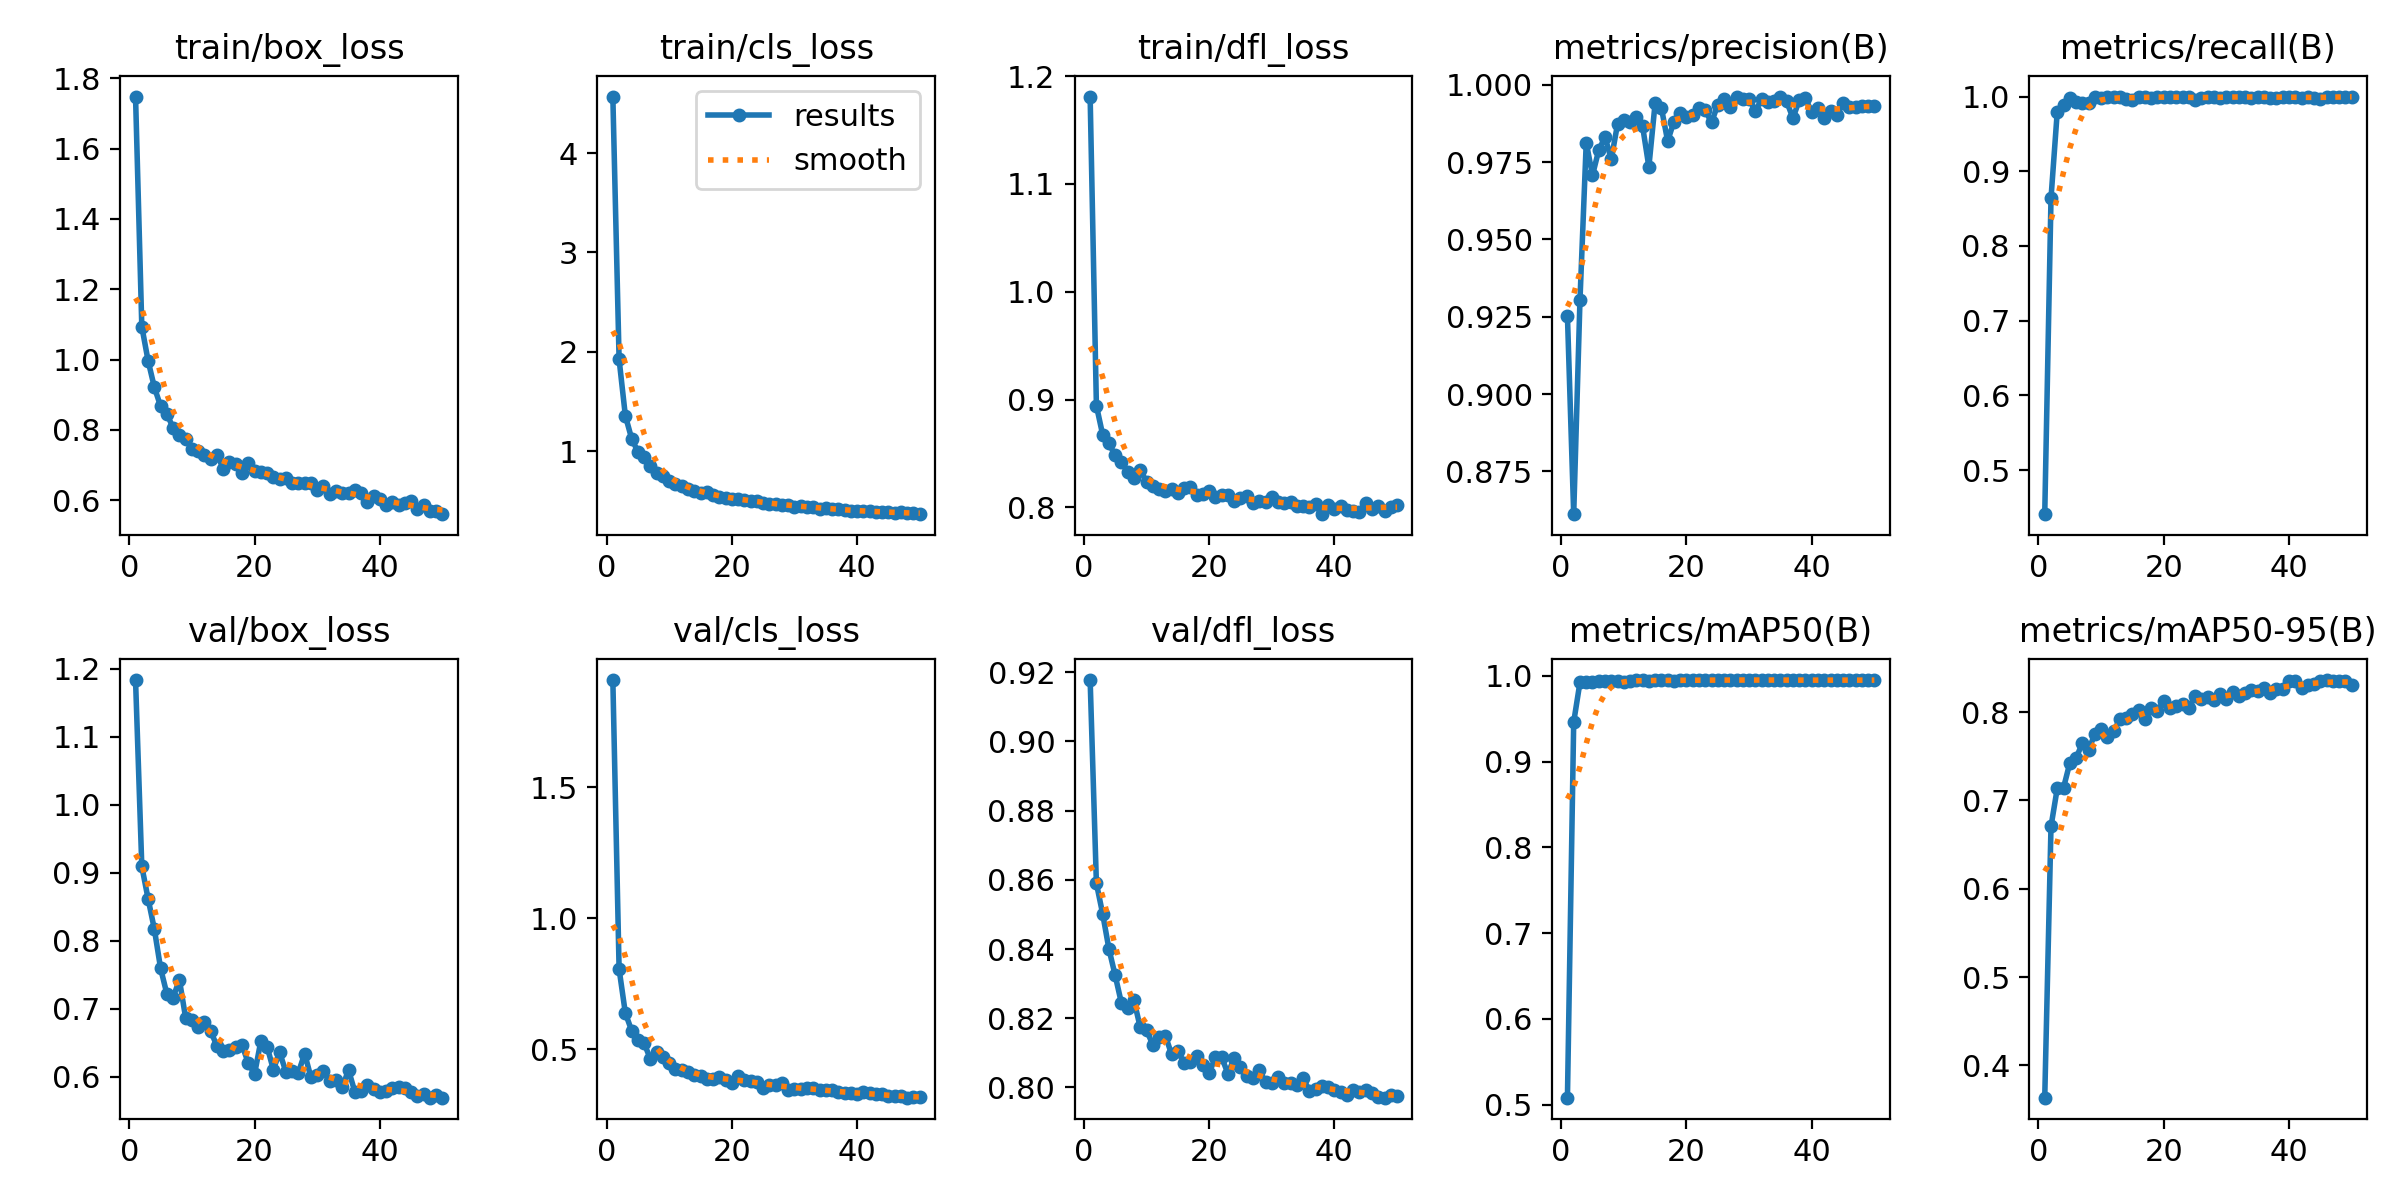


Confusion Matrix:


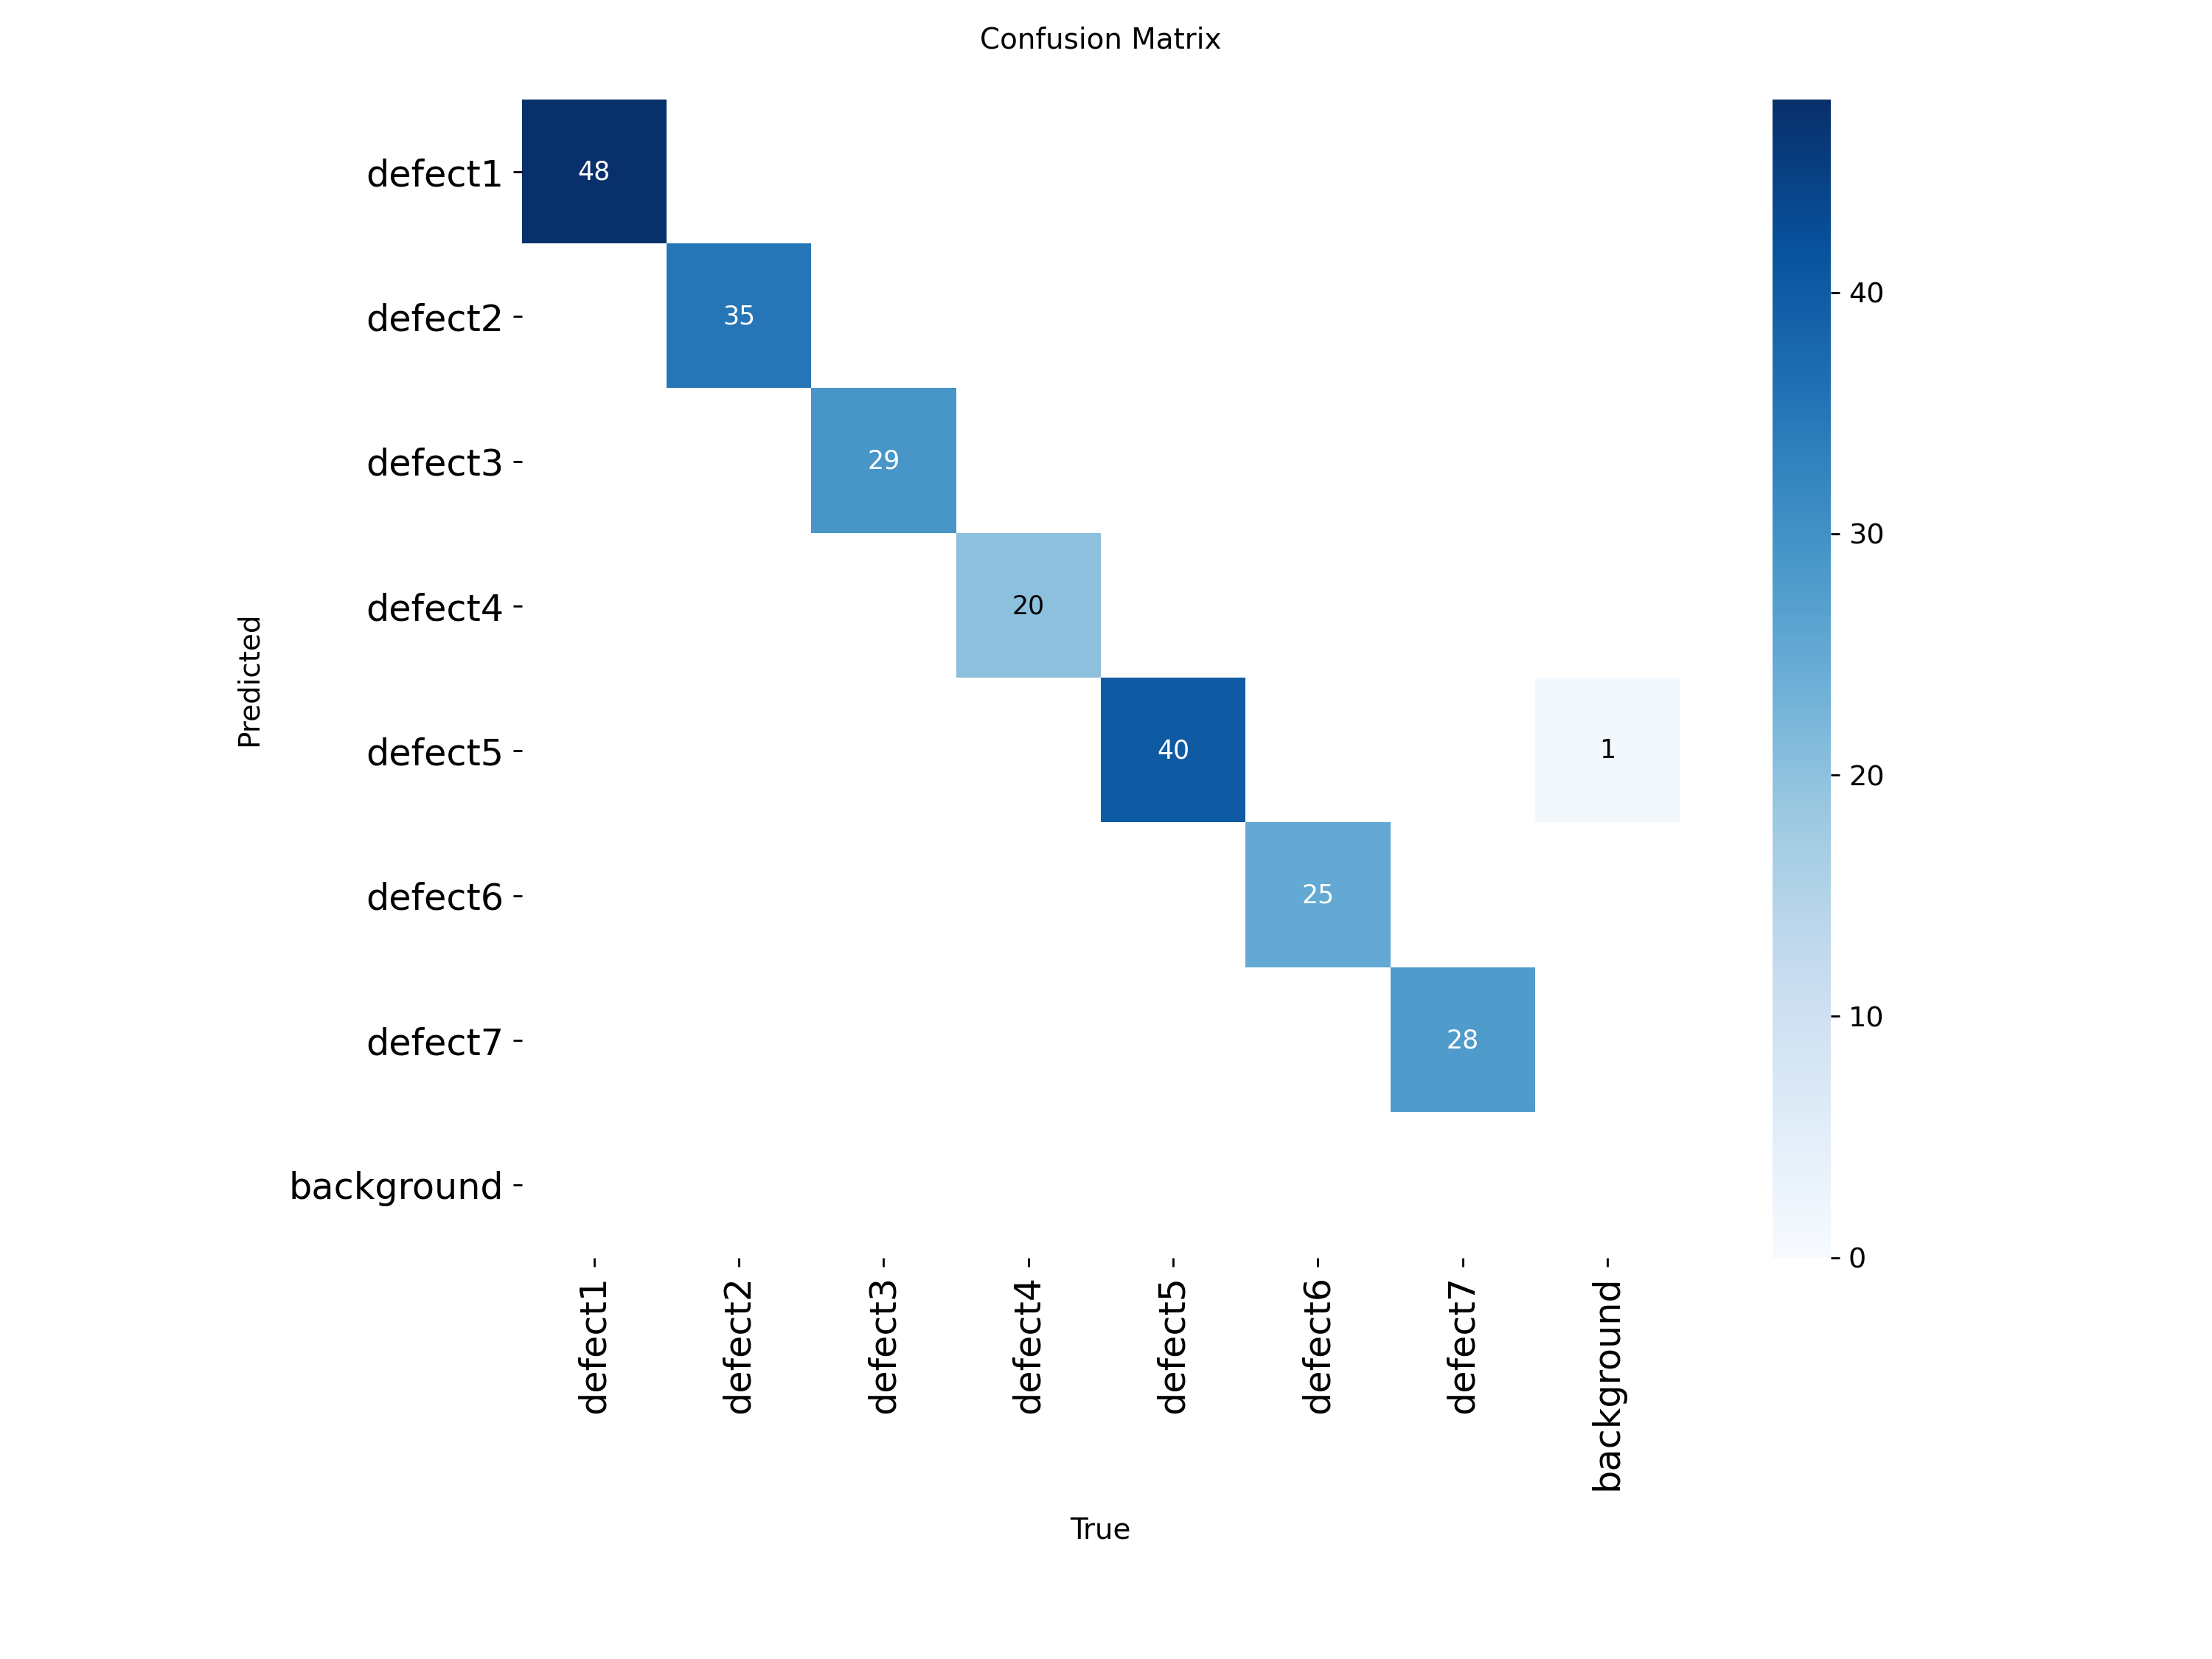


Total plots found: 2/2
Note: F1 and PR curves not generated by this training run


In [8]:
from IPython.display import Image as IPImage, display

print("Training Visualizations Generated by YOLOv8:\n")

plot_files = {
    'Results and Training Curves': RESULTS_DIR / 'results.png',
    'Confusion Matrix': RESULTS_DIR / 'confusion_matrix.png',
}

found_plots = 0
for title, filepath in plot_files.items():
    if filepath.exists():
        print(f"\n{title}:")
        display(IPImage(filename=str(filepath), width=900))
        found_plots += 1
    else:
        print(f"\n{title}: File not found")

print(f"\nTotal plots found: {found_plots}/2")
print("Note: F1 and PR curves not generated by this training run")


In [10]:
summary_data = {
    'Metric': ['mAP@50', 'mAP@50-95', 'Precision', 'Recall', 'Box Loss', 'Classification Loss'],
    'Final Value': [
        f"{final_epoch['metrics/mAP50(B)']:.4f}",
        f"{final_epoch['metrics/mAP50-95(B)']:.4f}",
        f"{final_epoch['metrics/precision(B)']:.4f}",
        f"{final_epoch['metrics/recall(B)']:.4f}",
        f"{final_epoch['train/box_loss']:.4f}",
        f"{final_epoch['train/cls_loss']:.4f}"
    ],
    'Assessment': [
        'Excellent - Perfect detection accuracy',
        'Very Good - Strong across all IoU thresholds',
        'Excellent - Minimal false positives',
        'Outstanding - Detects virtually all defects',
        'Low - Accurate box predictions',
        'Low - Correct classifications'
    ]
}

summary_df = pd.DataFrame(summary_data)

print("\n" + "="*90)
print("MODEL PERFORMANCE ASSESSMENT")
print("="*90)
print(summary_df.to_string(index=False))
print("="*90)
print("\nConclusion:")
print("  Model achieved production-grade performance on PCB defect detection task.")
print("  Ready for deployment with 99.49% mAP@50 and 99.99% recall on validation set.")



MODEL PERFORMANCE ASSESSMENT
             Metric Final Value                                   Assessment
             mAP@50      0.9949       Excellent - Perfect detection accuracy
          mAP@50-95      0.8308 Very Good - Strong across all IoU thresholds
          Precision      0.9933          Excellent - Minimal false positives
             Recall      0.9999  Outstanding - Detects virtually all defects
           Box Loss      0.5606               Low - Accurate box predictions
Classification Loss      0.3689                Low - Correct classifications

Conclusion:
  Model achieved production-grade performance on PCB defect detection task.
  Ready for deployment with 99.49% mAP@50 and 99.99% recall on validation set.
